In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [2]:
#Specify date range for analysis:

end = dt.datetime.now()
start = dt.datetime(2020,11,8)
start, end

(datetime.datetime(2020, 11, 8, 0, 0),
 datetime.datetime(2021, 11, 8, 11, 23, 24, 558876))

In [3]:
#Select the stocks/tickers you would like to analyse:

stockList = ['2120', '8020', '4280','8190']
stocks = [i + '.SR' for i in stockList]
stocks

['2120.SR', '8020.SR', '4280.SR', '8190.SR']

In [4]:
#call the Pandas_Datareader DataReader module:

df = pdr.get_data_yahoo(stocks, start, end)
df.head()

Attributes  Adj Close                                   Close             \
Symbols       2120.SR    8020.SR   4280.SR 8190.SR    2120.SR    8020.SR   
Date                                                                       
2020-11-08  15.446837  16.520000  7.161202   12.76  15.600000  16.520000   
2020-11-09  16.040947  16.920000  7.371825   13.00  16.200001  16.920000   
2020-11-10  16.199375  17.000000  7.620744   13.34  16.360001  17.000000   
2020-11-11  16.219179  17.160000  7.534580   13.40  16.379999  17.160000   
2020-11-12  16.258785  17.059999  7.505859   13.30  16.420000  17.059999   

Attributes                       High             ...     Low          \
Symbols    4280.SR 8190.SR    2120.SR    8020.SR  ... 4280.SR 8190.SR   
Date                                              ...                   
2020-11-08    7.48   12.76  15.640000  16.559999  ...    7.40   12.46   
2020-11-09    7.70   13.00  16.299999  17.080000  ...    7.44   12.70   
2020-11-10    7.96   13.34  16.840000  17.820000  ...    7.70   13.00   
2020-11-11    7.87   13.40  16.620001  17.400000  ...    7.70   13.20   
2020-11-12    7.84   13.30  16.620001  17.200001  ...    7.74   13.20   

Attributes       Open                                Volume             \
Symbols       2120.SR    8020.SR 4280.SR 8190.SR    2120.SR    8020.SR   
Date                                                                     
2020-11-08  14.880000  16.000000    7.40   12.80  1718492.0  2830552.0   
2020-11-09  15.700000  16.799999    7.47   12.80  2262021.0  4542213.0   
2020-11-10  16.600000  17.100000    7.95   13.10  2507863.0  8004365.0   
2020-11-11  16.400000  17.240000    7.94   13.50  1285904.0  3814173.0   
2020-11-12  16.299999  17.120001    7.88   13.54  1165693.0  1936582.0   

Attributes                        
Symbols       4280.SR    8190.SR  
Date                              
2020-11-08   250748.0  2070907.0  
2020-11-09   980385.0  1201354.0  
2020-11-10  2396054.0  2583416.0  
2020-11-11  1353534.0  1218553.0  
2020-11-12   834570.0   737458.0  

[5 rows x 24 columns]

In [5]:
returnV = df['Adj Close']
returnV.head()

Symbols,2120.SR,8020.SR,4280.SR,8190.SR
Date,,,,
2020-11-08,15.446837,16.520000,7.161202,12.76
2020-11-09,16.040947,16.920000,7.371825,13.00
2020-11-10,16.199375,17.000000,7.620744,13.34
2020-11-11,16.219179,17.160000,7.534580,13.40
2020-11-12,16.258785,17.059999,7.505859,13.30


In [6]:
returnV = df['Adj Close'].pct_change()

In [7]:
returnV.head()

Symbols,2120.SR,8020.SR,4280.SR,8190.SR
Date,,,,
2020-11-08,NaN,NaN,NaN,NaN
2020-11-09,0.038462,0.024213,0.029412,0.018809
2020-11-10,0.009876,0.004728,0.033766,0.026154
2020-11-11,0.001223,0.009412,-0.011307,0.004498
2020-11-12,0.002442,-0.005828,-0.003812,-0.007463


In [8]:
returnV=returnV.dropna()
returnV.head()

Symbols,2120.SR,8020.SR,4280.SR,8190.SR
Date,,,,
2020-11-09,0.038462,0.024213,0.029412,0.018809
2020-11-10,0.009876,0.004728,0.033766,0.026154
2020-11-11,0.001223,0.009412,-0.011307,0.004498
2020-11-12,0.002442,-0.005828,-0.003812,-0.007463
2020-11-15,0.037759,0.029308,-0.001276,0.040602


In [9]:
matrix_of_return_values = returnV.to_numpy()
matrix_of_return_values = np.asmatrix(matrix_of_return_values)
matrix_of_return_values=matrix_of_return_values.T

In [10]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [12]:
no_of_asset_classes=4
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /=sum(random_asset_weights)
    random_asset_weights=np.asmatrix(random_asset_weights)
    return random_asset_weights 

In [13]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances =np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean =asset_weights*asset_means #t
    portfolio_mean=portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights*asset_covariances*asset_weights.T) #t
    portfolio_standard_deviation=portfolio_standard_deviation.item()
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [14]:
no_of_portfolios=2000
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[0])
    portfolio_standard_deviations.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[2])

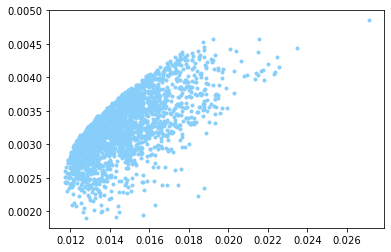

In [15]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [16]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

In [17]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.24122181 0.06012945 0.22800733 0.47064141]]
0.2568514627672682


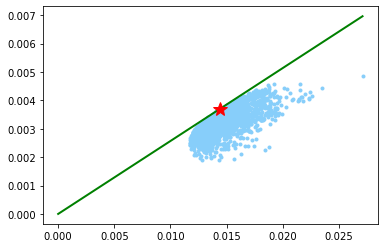

In [18]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [19]:
df.index 

DatetimeIndex(['2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19',
               ...
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-31',
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [20]:
df.columns

MultiIndex([('Adj Close', '2120.SR'),
            ('Adj Close', '8020.SR'),
            ('Adj Close', '4280.SR'),
            ('Adj Close', '8190.SR'),
            (    'Close', '2120.SR'),
            (    'Close', '8020.SR'),
            (    'Close', '4280.SR'),
            (    'Close', '8190.SR'),
            (     'High', '2120.SR'),
            (     'High', '8020.SR'),
            (     'High', '4280.SR'),
            (     'High', '8190.SR'),
            (      'Low', '2120.SR'),
            (      'Low', '8020.SR'),
            (      'Low', '4280.SR'),
            (      'Low', '8190.SR'),
            (     'Open', '2120.SR'),
            (     'Open', '8020.SR'),
            (     'Open', '4280.SR'),
            (     'Open', '8190.SR'),
            (   'Volume', '2120.SR'),
            (   'Volume', '8020.SR'),
            (   'Volume', '4280.SR'),
            (   'Volume', '8190.SR')],
           names=['Attributes', 'Symbols'])

In [21]:
Close = df.Close
Close.head()

Symbols,2120.SR,8020.SR,4280.SR,8190.SR
Date,,,,
2020-11-08,15.600000,16.520000,7.48,12.76
2020-11-09,16.200001,16.920000,7.70,13.00
2020-11-10,16.360001,17.000000,7.96,13.34
2020-11-11,16.379999,17.160000,7.87,13.40
2020-11-12,16.420000,17.059999,7.84,13.30


In [22]:
Close.describe()     #(percentiles=[0.1,0.5,0.9])

Symbols,2120.SR,8020.SR,4280.SR,8190.SR
count,252.000000,252.000000,252.000000,252.000000
mean,38.837024,26.359802,9.080437,24.671310
std,14.765247,5.016663,1.297082,5.929262
min,15.600000,16.520000,7.450000,12.760000
25%,19.770000,22.920000,7.840000,21.944999
50%,41.375000,25.375000,8.305000,24.150000
75%,52.225000,31.262500,10.460000,29.275000
max,58.700001,34.900002,11.600000,35.200001


<AxesSubplot:xlabel='Date'>

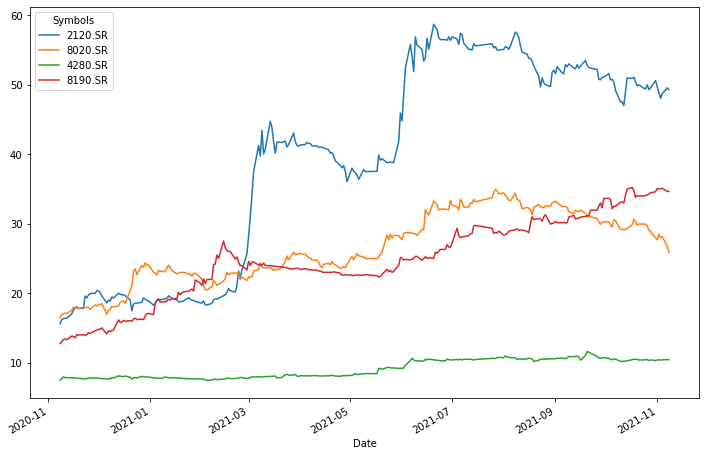

In [23]:
Close.plot(figsize=(12,8))

In [24]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'

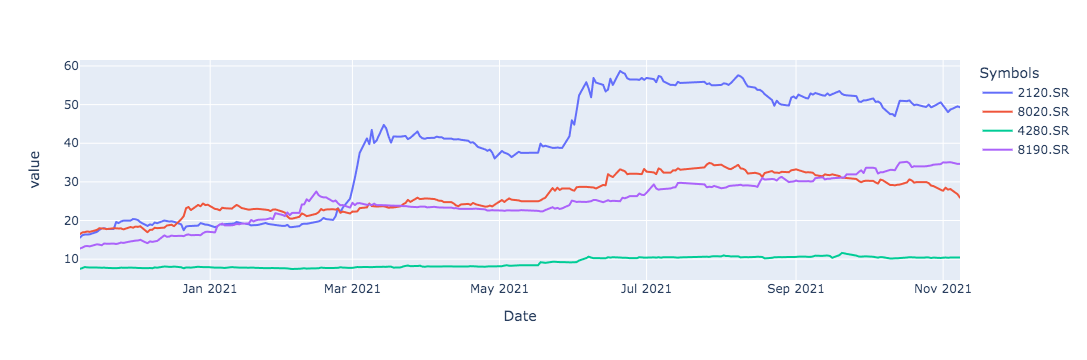

In [25]:
Close.plot()